In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Загрузка данных
hr = pd.read_csv('HR.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [93]:
#Рассчитайте основные статистики для переменных
hr.info()  #Выводим информацию  текущих данных, проверяем отсутствие пустых значений

categorical_cols = ['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

print("\nБазовые статистики числовых столбцов:")
print(hr[numeric_cols].describe())

print("\nБазовые статистики столбцов объектного типа:")
print(hr[categorical_cols].describe(include=['object']))

print("\nКоличество уникальных значений в категориальных столбцах:")
print(hr[categorical_cols].nunique())

print("\nМода") #Для всех столбцов
print(hr.mode())

#Расчетные статистические характеристики

print("\nМедиана:")
print(hr[numeric_cols].median())

print("\nСтандартное отклонение:")
print(hr[numeric_cols].std())

print("\nРазмах (max-min):")
max = hr[numeric_cols].max()
min = hr[numeric_cols].min()
print(max - min)

print("\nСредеарифметическое")
print(hr[numeric_cols].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Базовые статистики числовых столбцов:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102

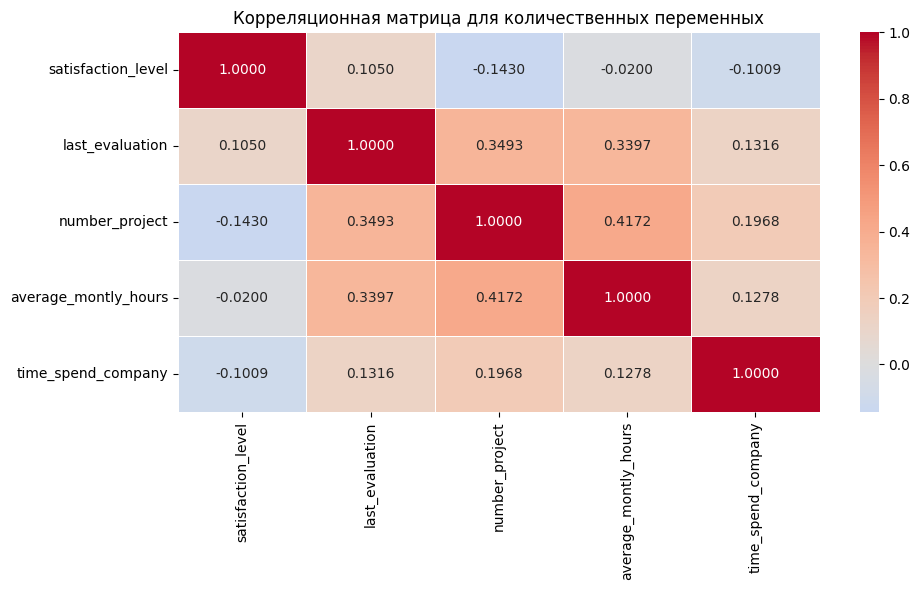


Две наиболее скорелированные переменные
average_montly_hours  number_project          0.417211
number_project        average_montly_hours    0.417211
dtype: float64

Две наименее скорелированные переменные
satisfaction_level    average_montly_hours    0.020048
average_montly_hours  satisfaction_level      0.020048
dtype: float64


In [94]:
#Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные
corr_matrix = hr[numeric_cols].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".4f", linewidths=.5)
plt.title('Корреляционная матрица для количественных переменных')
plt.tight_layout()
plt.show()

corr_unstacked = corr_matrix.unstack() #Преобразуем в табличный вариант
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)] #Убираем диагональные элементы, которые коррелируют сами с обой, коэффициент корреляции = 1

print("\nДве наиболее скорелированные переменные")
print(corr_unstacked.abs().sort_values(ascending=False).head(2)) #Берем абсолютное значение, не учитывая направление корреляции (отрицательное или положительное)

print("\nДве наименее скорелированные переменные")
print(corr_unstacked.abs().sort_values(ascending=True).head(2))


Наибольшая зависимость возникает в столбцах со Средним количеством часов на рабочем месте и кол-вом проектов. Можно предположить чо люди, которые имеют больше всего проектов больше всего времени проводят на работе.
Низкая корреляция наблюдается между столбцами Уровень удовлетворенности и Среднее количество часов на работе. Это значит уровень удовлетворенности практически не зависит от кол-ва времени проведенного на работе. Однако коэффициент корреляции между этими столбцами отрицательный. Из чего следует вывод, что чем меньше сотрудник проводит времени на работе, тем больше  него уровень удовлетворенности.

Количество сотрудников в кадлом из департаментов
department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


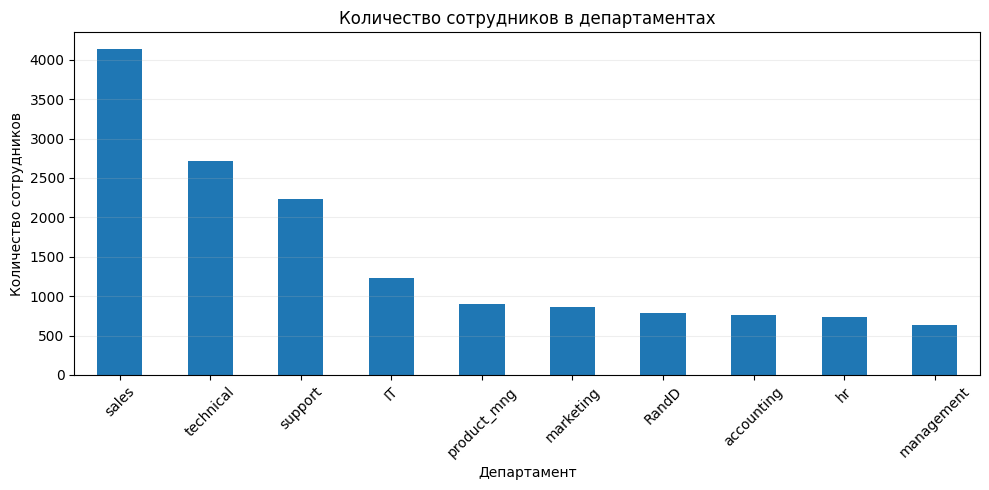

In [95]:
#Рассчитайте сколько сотрудников работает в каждом департаменте.
dep = hr['department'].value_counts()
print("Количество сотрудников в кадлом из департаментов")
print(dep)

plt.figure(figsize=(10,5))
dep.plot(kind='bar')
plt.title('Количество сотрудников в департаментах')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.21)
plt.tight_layout()
plt.show()

Количество сотрудников в зависимости от зарплаты
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


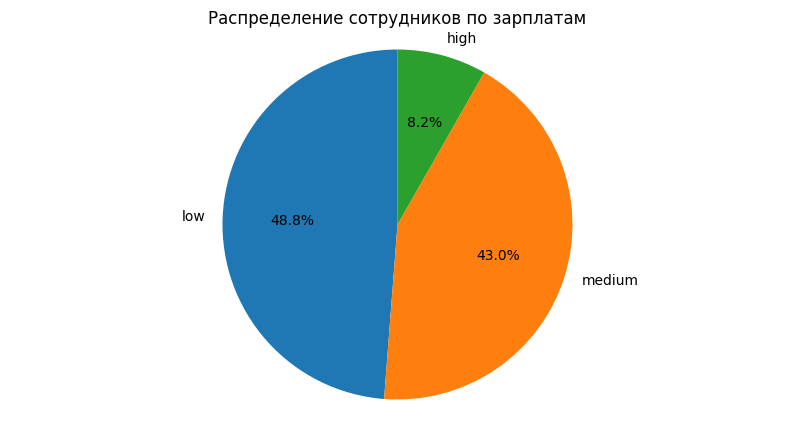

In [96]:
#Показать распределение сотрудников по зарплатам.
sal = hr['salary'].value_counts()
print("Количество сотрудников в зависимости от зарплаты")
print(sal)

# Покажем распределение с помощью круговой диаграммы
plt.figure(figsize=(10, 5))
plt.pie(sal, labels=sal.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение сотрудников по зарплатам')
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.show()

<Figure size 1000x500 with 0 Axes>

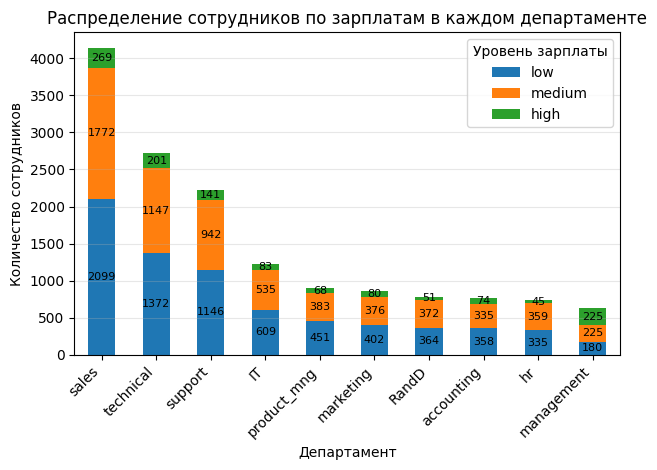

In [97]:
#Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
#Покажем это распределение с помощью столбчатой диаграммы с накоплением
sal_by_dep = pd.crosstab(hr['department'], hr['salary'])
sal_by_dep = sal_by_dep[['low', 'medium', 'high']]  # Задаем порядок сортировки

# Сортируем по общему количеству
sal_by_dep = sal_by_dep.loc[sal_by_dep.sum(axis=1).sort_values(ascending=False).index]

# Создаем накопленную диаграмму
plt.figure(figsize=(10,5))
sal_by_dep.plot(kind='bar', stacked=True)

plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Уровень зарплаты')
plt.grid(axis='y', alpha=0.3)

# Добавляем поодписи для каждой группы зарплаты внутри столбцов
for i, dep in enumerate(sal_by_dep.index):
    cumulative_height = 0
    for j, salary_level in enumerate(['low', 'medium', 'high']):
        value = sal_by_dep.loc[dep, salary_level]
        text_y = cumulative_height + value / 2
        plt.text(i, text_y, str(value), ha='center', va='center', fontsize=8, color='black')
        cumulative_height += value

plt.tight_layout()
plt.show()

Тест Шапиро-Уилка для сотрудников с низким уровнем зарплат stat_low = 0.95986, p_low = 0.00000
Данные распределены не нормально
Тест Шапиро-Уилка для сотрудников со средним уровнем зарплат stat_med = 0.96417, p_med = 0.00000
Данные распределены не нормально
Тест Шапиро-Уилка для сотрудников с высоким уровнем зарплат stat_h = 0.97121, p_h = 0.00000
Данные распределены не нормально

Тест Левена:
Дисперсии не однородны

ANOVA тест:
 F-статистика: 0.458
 p-value: 6.323e-01
Нет статистически значимых различий между группами


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7316.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6446.
  res = hypotest_fun_out(*samples, **kwds)


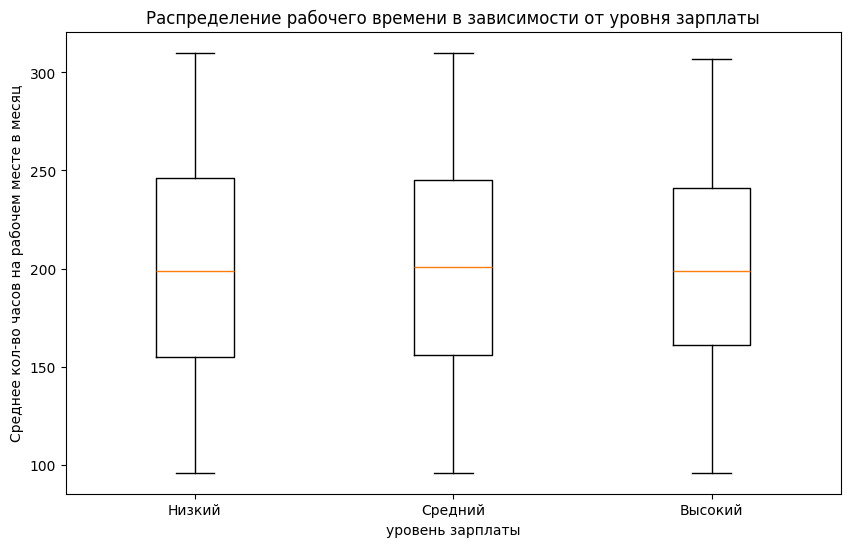

In [98]:
#Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
#Разделим сотрудников на группы, в зависимости от уровня оклада
low_salary_hours = hr[hr['salary'] == 'low']['average_montly_hours']
medium_salary_hours = hr[hr['salary'] == 'medium']['average_montly_hours']
high_salary_hours = hr[hr['salary'] == 'high']['average_montly_hours']

#Проведем тест Шапиро-Уилка на нормальность распределения
stat_low, p_low = stats.shapiro(low_salary_hours)
print("Тест Шапиро-Уилка для сотрудников с низким уровнем зарплат",f'stat_low = {stat_low:.5f}, p_low = {p_low:.5f}')
if p_low < 0.05:
  print("Данные распределены не нормально")
else:
  print("Данные распределены нормально")

stat_med, p_med = stats.shapiro(medium_salary_hours)
print("Тест Шапиро-Уилка для сотрудников со средним уровнем зарплат",f'stat_med = {stat_med:.5f}, p_med = {p_med:.5f}')
if p_med < 0.05:
  print("Данные распределены не нормально")
else:
  print("Данные распределены нормально")

stat_h, p_h = stats.shapiro(high_salary_hours)
print("Тест Шапиро-Уилка для сотрудников с высоким уровнем зарплат",f'stat_h = {stat_h:.5f}, p_h = {p_h:.5f}')
if p_h < 0.05:
  print("Данные распределены не нормально")
else:
  print("Данные распределены нормально")

# Прежде чем провести дисперсионный анализ проверим однородность дисперсий(тест Левена)
print("\nТест Левена:")
stat_levene, p_levene = stats.levene(low_salary_hours, medium_salary_hours, high_salary_hours)
if p_h > 0.05:
  print("Дисперсии однородные")
else:
  print("Дисперсии не однородны")

# Используем тест ANOVA для множественного сравнения
print(f"\nANOVA тест:")
f_stat, p_value_anova = stats.f_oneway(low_salary_hours, medium_salary_hours, high_salary_hours)
print(f" F-статистика: {f_stat:.3f}")
print(f" p-value: {p_value_anova:.3e}")

if p_value_anova < 0.05:
  print("Есть статистически значимые различия между группами")

  # Пост-хок анализ (тест Тьюки). После обнаружения статистически значимого эффекта необходимо дополнительное исследование с учетом проблемы множественного сравнения.
  print("\nРезультаты пост-хок теста Тьюки:")
  # Собираем все данные
  data = pd.DataFrame({
      'hours': np.concatenate([low_salary_hours, medium_salary_hours, high_salary_hours]),
      'group': ['low'] * len(low_salary_hours) + ['medium'] * len(medium_salary_hours) + ['high'] * len(high_salary_hours)})

  tukey = pairwise_tukeyhsd(data['hours'], data['group'], alpha=0.05)
  print(tukey)

else:
  print("Нет статистически значимых различий между группами")

plt.figure(figsize=(10, 6))
plt.boxplot([low_salary_hours,medium_salary_hours, high_salary_hours],
            tick_labels=['Низкий', 'Средний', 'Высокий'])
plt.title('Распределение рабочего времени в зависимости от уровня зарплаты')
plt.xlabel('уровень зарплаты')
plt.ylabel('Среднее кол-во часов на рабочем месте в месяц')
plt.show()


Проверка гипотезы показала, что статистически значимых различий между тем, сколько времени проводят на работе сотрудники с различным уровнем оклада нет. Поэтому утверждать, что люди с более высоким уровнем оклада проводят на работе больше времени, чем сотрудники с низким уровнем оклада, нельзя.

19 уволенных сотрудников, получивших повышение  в последние 5 лет из 3571 всех уволенных сотрудников
300 действующих сотрудников, получивших повышение  в последние 5 лет из 3571 всех действующих сотрудников
Доля сотрудников, получивших повышение за последние 5 лет
Уволенных 0.53%
Действующих 2.63%


<Figure size 1200x800 with 0 Axes>

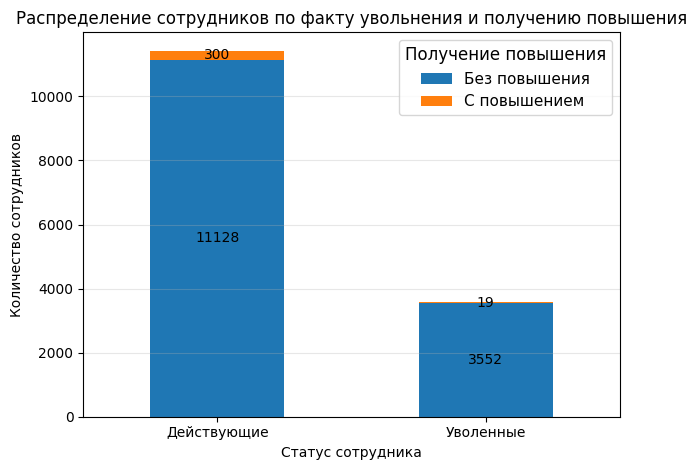


Средняя степень удовлетворенности работой
Среди уволенных сотрудников: 0.44
Среди действующих сотрудников: 0.67


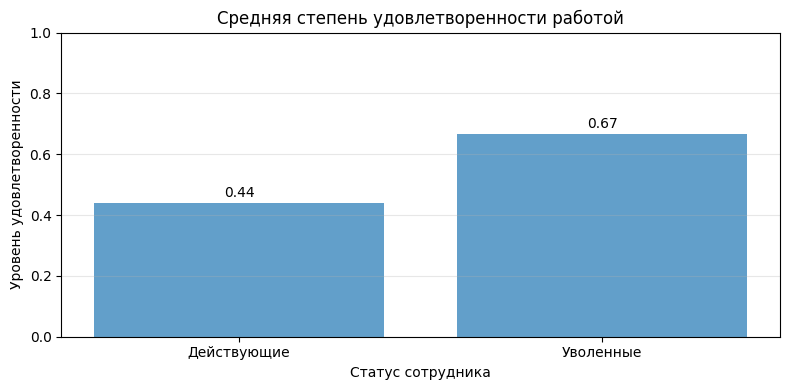


Среднее количество проектов
Среди уволенных сотрудников: 3.86
Среди действующих сотрудников: 3.79


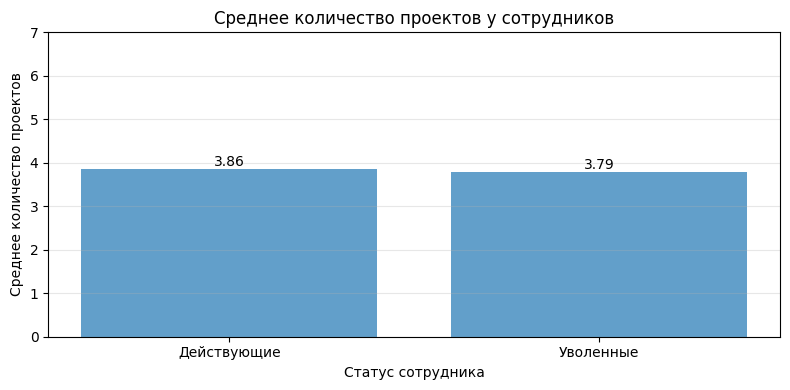


Распределение по количеству проектов (уволившиеся):
  2 проектов: 1567 чел. (43.9%)
  3 проектов: 72 чел. (2.0%)
  4 проектов: 409 чел. (11.5%)
  5 проектов: 612 чел. (17.1%)
  6 проектов: 655 чел. (18.3%)
  7 проектов: 256 чел. (7.2%)

Распределение по количеству проектов (не уволившиеся):
  2 проектов: 821 чел. (7.2%)
  3 проектов: 3983 чел. (34.9%)
  4 проектов: 3956 чел. (34.6%)
  5 проектов: 2149 чел. (18.8%)
  6 проектов: 519 чел. (4.5%)


In [99]:
# Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
# Доля сотрудников с повышением за последние 5 лет
# Средняя степень удовлетворенности
# Среднее количество проектов

#Разделим по группам, на уволившихся и действующих сотрудников
left_sotr = hr[hr['left'] == 1] #Уволенные
active_sotr = hr[hr['left'] == 0] #Действующие

#Расчет доли сотрудников с повышением за последние 5 лет
count_promotion_left_sotr = sum(left_sotr['promotion_last_5years'])#Количество уволенных сотрудников, получивших повышение  в последние 5 лет
count_promotion_active_sotr = sum(active_sotr['promotion_last_5years'])#Количество действующих сотрудников, получивших повышение  в последние 5 лет

print(f"{count_promotion_left_sotr} уволенных сотрудников, получивших повышение  в последние 5 лет из {len(left_sotr)} всех уволенных сотрудников")
print(f"{count_promotion_active_sotr} действующих сотрудников, получивших повышение  в последние 5 лет из {len(left_sotr)} всех действующих сотрудников")

promotion_left_sotr = (count_promotion_left_sotr/len(left_sotr['promotion_last_5years'])*100)
promotion_active_sotr = (count_promotion_active_sotr/len(active_sotr['promotion_last_5years'])*100)

print("Доля сотрудников, получивших повышение за последние 5 лет")
print(f"Уволенных {promotion_left_sotr:.2f}%")
print(f"Действующих {promotion_active_sotr:.2f}%")

# Создаем накопленную диаграмму для визуализации
promotion_by_left = pd.crosstab(hr['left'], hr['promotion_last_5years'])

# Переименовываем индексы и столбцы для лучшей читаемости
promotion_by_left.index = ['Действующие', 'Уволенные']
promotion_by_left.columns = ['Без повышения', 'С повышением']

# Создаем накопленную диаграмму
plt.figure(figsize=(12, 8))
ax = promotion_by_left.plot(kind='bar', stacked=True)

plt.title('Распределение сотрудников по факту увольнения и получению повышения')
plt.xlabel('Статус сотрудника')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=0)

# Добавляем значения на каждый сегмент
for i, left_status in enumerate(promotion_by_left.index):
    total = promotion_by_left.loc[left_status].sum()
    cumulative = 0

    for j, promotion_status in enumerate(promotion_by_left.columns):
        value = promotion_by_left.loc[left_status, promotion_status]
        if value > 0:
            # Позиция текста в середине сегмента
            text_y = cumulative + value / 2
            ax.text(i, text_y, f'{value}',
                   ha='center', va='center', color='black')
            cumulative += value

plt.legend(title='Получение повышения', title_fontsize=12, fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#Расчет средней степени удовлетворенности работой сотрудников

satisfaction_left = left_sotr['satisfaction_level'].mean()  #Средняя степень удовлетворенности уволенных сотрудников
satisfaction_active = active_sotr['satisfaction_level'].mean() #Средняя степень удовлетворенности действующих сотрудников

print("\nСредняя степень удовлетворенности работой")
print(f"Среди уволенных сотрудников: {satisfaction_left:.2f}")
print(f"Среди действующих сотрудников: {satisfaction_active:.2f}")

#Визуализация
satisfaction_values = [satisfaction_left, satisfaction_active]
category = ['Действующие','Уволенные']

plt.figure(figsize=(8, 4))
bars = plt.bar(category, satisfaction_values, alpha=0.7)

plt.title('Средняя степень удовлетворенности работой')
plt.xlabel('Статус сотрудника')
plt.ylabel('Уровень удовлетворенности')
plt.ylim(0, 1)

# Добавляем значения на столбцы
for bar, value in zip(bars, satisfaction_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.2f}', ha='center', va='bottom',)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#Расчет среднего количества проектов

project_left = left_sotr['number_project'].mean()  #Средняя кол-во проектов уволенных сотрудников
project_active = active_sotr['number_project'].mean() #Средняя кол-во проектов действующих сотрудников

print("\nСреднее количество проектов")
print(f"Среди уволенных сотрудников: {project_left:.2f}")
print(f"Среди действующих сотрудников: {project_active:.2f}")

project_values = [project_left, project_active]
category = ['Действующие','Уволенные']

#Визуализация
plt.figure(figsize=(8, 4))
bars = plt.bar(category, project_values, alpha=0.7)

plt.title('Среднее количество проектов у сотрудников')
plt.xlabel('Статус сотрудника')
plt.ylabel('Среднее количество проектов')
plt.ylim(0, 7)

# Добавляем значения на столбцы
for bar, value in zip(bars, project_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.2f}', ha='center', va='bottom',)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nРаспределение по количеству проектов (уволившиеся):")
projects_left_dist = left_sotr['number_project'].value_counts().sort_index()
for projects, count in projects_left_dist.items():
    percentage = (count / len(left_sotr)) * 100
    print(f"  {projects} проектов: {count} чел. ({percentage:.1f}%)")

print("\nРаспределение по количеству проектов (не уволившиеся):")
projects_active_dist = active_sotr['number_project'].value_counts().sort_index()
for projects, count in projects_active_dist.items():
    percentage = (count / len(active_sotr)) * 100
    print(f"  {projects} проектов: {count} чел. ({percentage:.1f}%)")
https://github.com/olgamalkova91/Code/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%9C%D0%B0%D0%BB%D1%8C%D0%BA%D0%BE%D0%B2%D0%B0.ipynb